# Exploring the Links Between GDP per Capita, Life Expectancy, and Happiness: A Cross-National Analysis

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
from IPython.display import display

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read data

In this project, I analyzed the World Happiness Report data from Kaggle using Python. I imported the necessary libraries and loaded the datasets for each year (2015 to 2019). I then standardized the column names across all datasets and added a new column to store the respective year. After that, I combined all the datasets into one

In [313]:
# Step 1: Read each year's dataset separately
data_2015 = pd.read_csv('2015.csv')
data_2016 = pd.read_csv('2016.csv')
data_2017 = pd.read_csv('2017.csv')
data_2018 = pd.read_csv('2018.csv')
data_2019 = pd.read_csv('2019.csv')

# Step 2: Standardize the column names across all datasets
column_names = {
    'Country': 'Country',
    'Region': 'Region',
    'Happiness Rank': 'Happiness Rank',
    'Happiness.Score': 'Happiness Score',
    'Happiness Score': 'Happiness Score',
    'Score': 'Happiness Score',
    'Economy (GDP per Capita)': 'GDP per Capita',
    'GDP per capita': 'GDP per Capita',
    'Economy..GDP.per.Capita.': 'GDP per Capita',
    'Family': 'Social Support',
    'Social support': 'Social Support',
    'Health (Life Expectancy)': 'Life Expectancy',
    'Healthy life expectancy': 'Life Expectancy',
    'Health..Life.Expectancy.': 'Life Expectancy',
    'Freedom': 'Freedom',
    'Freedom to make life choices': 'Freedom',
    'Trust (Government Corruption)': 'Perceptions of Corruption',
    'Perceptions of corruption': 'Perceptions of Corruption',
    'Trust..Government.Corruption.': 'Perceptions of Corruption',
    'Generosity': 'Generosity',
    'Dystopia Residual': 'Dystopia Residual',
    'Dystopia.Residual': 'Dystopia Residual'
}

data_2015.rename(columns=column_names, inplace=True)
data_2016.rename(columns=column_names, inplace=True)
data_2017.rename(columns=column_names, inplace=True)
data_2018.rename(columns=column_names, inplace=True)
data_2019.rename(columns=column_names, inplace=True)

# Step 3: Add a new column to each dataset to store the respective year
data_2015['Year'] = 2015
data_2016['Year'] = 2016
data_2017['Year'] = 2017
data_2018['Year'] = 2018
data_2019['Year'] = 2019

# Step 4: Combine all datasets into one
data = pd.concat([data_2015, data_2016, data_2017, data_2018, data_2019], ignore_index=True)


## Clean Dataset

Next, I cleaned the data by removing rows with missing values, combining the 'Country' and 'Country or region' columns, and making the 'Country' column the index. I also selected the columns I wanted to keep and saved the cleaned dataset to a new file.

In [314]:
# Step 1: Remove all rows with missing values in the 'Country' or 'Country or region' column
data.dropna(subset=['Country', 'Country or region'], how='all', inplace=True)

# Step 2: Combine 'Country' and 'Country or region' columns into one 'Country' column
data['Country'] = data['Country'].fillna(data['Country or region'])

# Step 3: Make "Country" the index
data.set_index('Country', inplace=True)

# Step 4: Rename the index to country
data.index.name = 'Country'   

# Step 5: Select the columns we want to keep
data = data[['Year', 'Happiness Score', 'GDP per Capita', 'Life Expectancy']]

# Step 6: Remove all rows with missing values
data.dropna(inplace=True)

# Step 7: Save the cleaned dataset to a new file
data.to_csv('world-happiness-report.csv')  

# Step 8: Show the first 5 rows of the dataset
data.head()

,Year,Happiness Score,GDP per Capita,Life Expectancy
Country,,,,
Switzerland,2015,7.587,1.39651,0.94143
Iceland,2015,7.561,1.30232,0.94784
Denmark,2015,7.527,1.32548,0.87464
Norway,2015,7.522,1.45900,0.88521
Canada,2015,7.427,1.32629,0.90563


## Explore each data set

I created an interactive plot to display the trends in Happiness Score, GDP per Capita, Perceptions of Corruption, and Life Expectancy for any country in the dataset.

In [315]:
# Define the plotting function
def plot_func(country, y_axis):
    country_data = data.loc[country]
    plt.plot(country_data['Year'], country_data[y_axis], marker='o')
    plt.xlabel('Year')
    plt.ylabel(y_axis)
    plt.title(f'{y_axis} of {country} Over the Years')
    
    # Set the x-axis ticks to display the years accurately
    plt.xticks(country_data['Year'].values)

    plt.show()

# Create a dropdown widget to choose the country
country_widget = widgets.Dropdown(
    options=data.index.unique(),
    description='Country:',
    disabled=False,
)

# Create a dropdown widget to choose the y-axis variable
y_axis_widget = widgets.Dropdown(
    options=['Happiness Score', 'GDP per Capita', 'Life Expectancy'],
    description='Y-Axis:',
    disabled=False,
)

widgets.interact(plot_func, country=country_widget, y_axis=y_axis_widget);


interactive(children=(Dropdown(description='Country:', options=('Switzerland', 'Iceland', 'Denmark', 'Norway',…

I also created a scatter plot that visualizes the relationship between Happiness Score and GDP per Capita, with bubble size (and color) representing Life Expectancy.

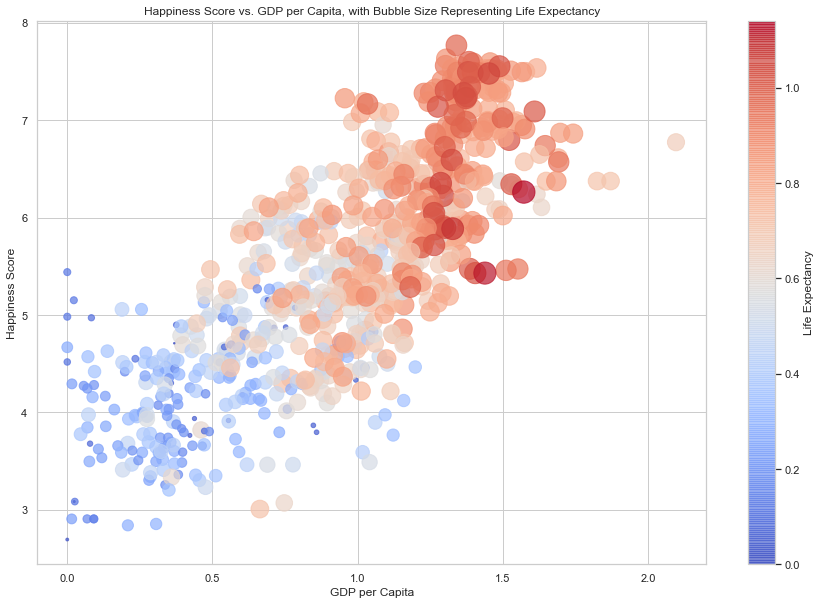

In [316]:
# Scale the life expectancy values to be within a reasonable range
life_expectancy_scaled = (data['Life Expectancy'] - data['Life Expectancy'].min()) / (data['Life Expectancy'].max() - data['Life Expectancy'].min())
life_expectancy_sizes = life_expectancy_scaled * 500

# Set up the scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(data['GDP per Capita'], data['Happiness Score'], c=data['Life Expectancy'], cmap='coolwarm', s=life_expectancy_sizes, alpha=0.7)

# Add axis labels and a title
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs. GDP per Capita, with Bubble Size Representing Life Expectancy')

# Add a colorbar legend
cbar = plt.colorbar()
cbar.set_label('Life Expectancy')

# Show the plot
plt.show()

I computed the correlation matrix for the selected variables and displayed it as a heatmap. I then adjusted the heatmap by removing the first row and last column to better visualize the correlations between the independent variables

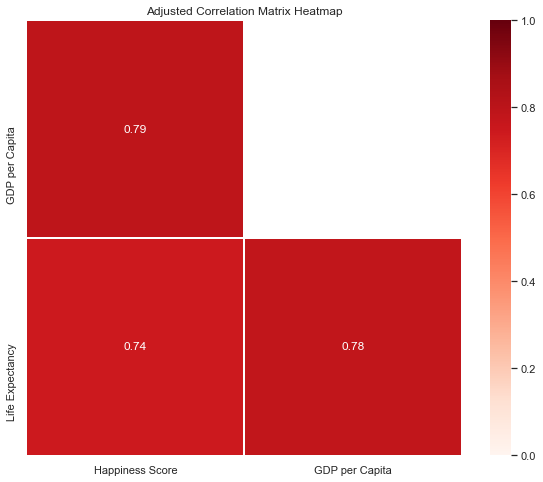

In [317]:
# Compute the correlation matrix
corr_matrix = data[['Happiness Score', 'GDP per Capita', 'Life Expectancy']].corr()

# Create a mask for the upper triangle, excluding the first and last rows
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
mask[0, :] = False
mask[:, -1] = False

# Select the desired rows and columns using iloc
corr_matrix_adj = corr_matrix.iloc[1:, :-1]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_adj, annot=True, cmap="Reds", vmin=0, vmax=1, square=True, linewidths=0.5, mask=mask[1:, :-1])
plt.title("Adjusted Correlation Matrix Heatmap")
plt.show()


# Analysis

In this project, I found that there are strong correlations between GDP per Capita, Life Expectancy, and Happiness Score. The correlation between GDP per Capita and Life Expectancy is 0.78, while the correlation between GDP per Capita and Happiness Score is 0.79. The correlation between Life Expectancy and Happiness Score is also strong, at 0.74. These findings indicate that an increase in GDP per Capita is likely to be associated with improvements in both Life Expectancy and Happiness Score. This could be attributed to the fact that higher GDP per Capita often leads to better access to healthcare, education, and social services, which in turn contribute to longer and happier lives for the citizens.

Furthermore, the strong positive correlation between Life Expectancy and Happiness Score suggests that people living in countries with longer life expectancies are generally happier. This might be due to the fact that longer life expectancies are often associated with better living conditions, lower levels of poverty, and more stable societies, all of which contribute to greater overall happiness.

The combined strong correlations between all three variables—GDP per Capita, Life Expectancy, and Happiness Score—highlight the interrelated nature of these factors. As a nation's GDP per Capita grows, it positively impacts Life Expectancy and Happiness Score.

## Limitations

One drawback of the method used in this analysis is that it only accounts for linear relationships between the variables. There could be other underlying factors that contribute to the observed correlations, which might not be captured by this approach. Additionally, correlation does not necessarily imply causation, and further research would be required to establish causal relationships between the factors.

In order to improve the analysis, we could consider using more sophisticated statistical methods, such as regression or machine learning techniques, to account for potential non-linear relationships and confounding factors. Additionally, incorporating more variables, such as education levels or income inequality, might provide a more comprehensive understanding of the factors influencing happiness.

# Conclusion

The analysis demonstrates that there are strong associations between a nation's GDP per Capita, Life Expectancy, and Happiness Score. By focusing on economic development and the provision of essential services, countries can work towards improving the happiness and well-being of their citizens. However, it is crucial to consider the limitations of the methods used and explore more complex relationships to obtain a deeper understanding of the factors influencing happiness.